In [37]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [19]:
data = pd.read_csv("C:/Users/bebit/Downloads/temps.csv")
print(data)

     year  month  day   week  temp_2  temp_1  average  actual  forecast_noaa   
0    2016      1    1    Fri      45      45     45.6      45             43  \
1    2016      1    2    Sat      44      45     45.7      44             41   
2    2016      1    3    Sun      45      44     45.8      41             43   
3    2016      1    4    Mon      44      41     45.9      40             44   
4    2016      1    5   Tues      41      40     46.0      44             46   
..    ...    ...  ...    ...     ...     ...      ...     ...            ...   
343  2016     12   27   Tues      42      42     45.2      47             41   
344  2016     12   28    Wed      42      47     45.3      48             41   
345  2016     12   29  Thurs      47      48     45.3      48             43   
346  2016     12   30    Fri      48      48     45.4      57             44   
347  2016     12   31    Sat      48      57     45.5      40             42   

     forecast_acc  forecast_under  frie

In [23]:
#1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de otro modo, realice un análisis descriptivo de sus datos, comente.

summary = data.describe()# Obtener el resumen estadístico
print(summary)# Imprimir el resumen estadístico


         year       month         day      temp_2      temp_1     average   
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000  \
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179 

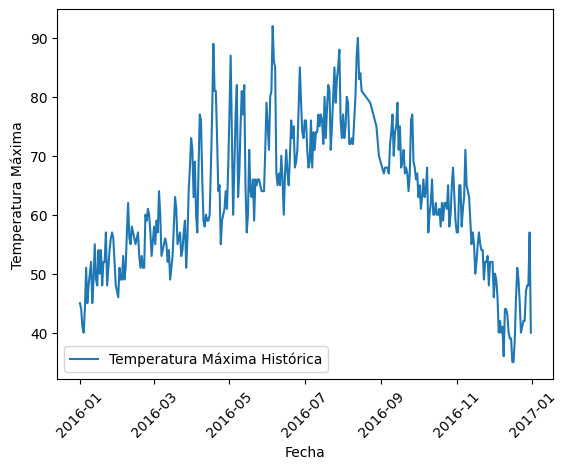

In [29]:
# Graficar temperaturas máximas históricas

# Construir la fecha a partir de las columnas year, month y day
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Graficar temperaturas máximas históricas
plt.plot(data['date'], data['actual'], label='Temperatura Máxima Histórica')
# Añadir leyenda y etiquetas de los ejes
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

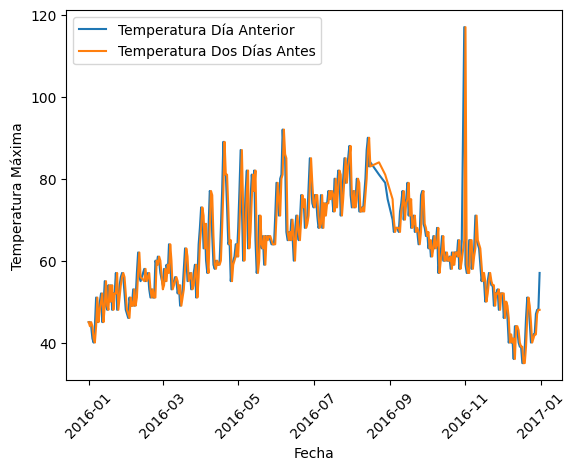

In [30]:
# Graficar temperaturas de los dos días anteriores
plt.plot(data['date'], data['temp_1'], label='Temperatura Día Anterior')
plt.plot(data['date'], data['temp_2'], label='Temperatura Dos Días Antes')
# Añadir leyenda y etiquetas de los ejes
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

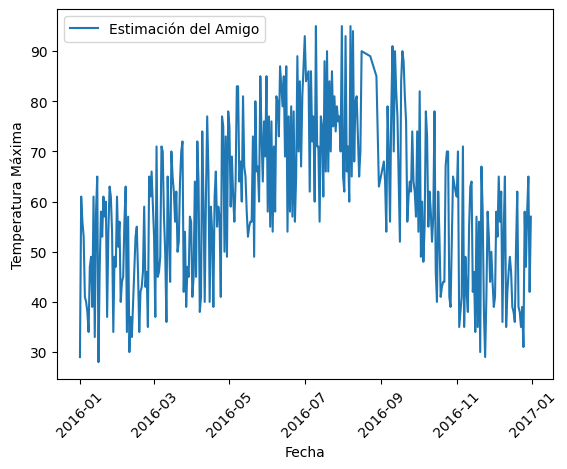

In [31]:
# Graficar estimación del amigo
plt.plot(data['date'], data['friend'], label='Estimación del Amigo')
# Añadir leyenda y etiquetas de los ejes
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

In [32]:
#Recodifique los días de la semana, creando siete variables 1-0 asociados a los días de la semana. Le puede facilitar el proceso usando get_dummies de la librería Pandas.

# Obtener variables dummy para los días de la semana
weekdays = pd.get_dummies(data['week'])

# Concatenar las variables dummy al DataFrame original
data = pd.concat([data, weekdays], axis=1)

# Mostrar el DataFrame con las variables dummy
print(data)

     year  month  day   week  temp_2  temp_1  average  actual  forecast_noaa   
0    2016      1    1    Fri      45      45     45.6      45             43  \
1    2016      1    2    Sat      44      45     45.7      44             41   
2    2016      1    3    Sun      45      44     45.8      41             43   
3    2016      1    4    Mon      44      41     45.9      40             44   
4    2016      1    5   Tues      41      40     46.0      44             46   
..    ...    ...  ...    ...     ...     ...      ...     ...            ...   
343  2016     12   27   Tues      42      42     45.2      47             41   
344  2016     12   28    Wed      42      47     45.3      48             41   
345  2016     12   29  Thurs      47      48     45.3      48             43   
346  2016     12   30    Fri      48      48     45.4      57             44   
347  2016     12   31    Sat      48      57     45.5      40             42   

     forecast_acc  forecast_under  frie

In [35]:
#4. Ahora, separe los datos en predictores y variable respuesta. Su variable Y es la temperatura máxima real y los predictores son todas las columnas que usa el 
#modelo para hacer una predicción. Asegúrese de transformar en una matriz Numpy porque esa es la forma en que funciona el algoritmo.

# Obtener los predictores (X) y la variable respuesta (y)
X = data.drop(['actual', 'date', 'week'], axis=1).values
y = data['actual'].values

# Mostrar las dimensiones de X y y
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)


Dimensiones de X: (348, 17)
Dimensiones de y: (348,)


In [36]:
#5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla (random_state = 42) para obtener los mismos valores.

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (261, 17)
Dimensiones de y_train: (261,)
Dimensiones de X_test: (87, 17)
Dimensiones de y_test: (87,)


In [38]:
#6. Cree una línea de base, es decir, el error que obtendremos si simplemente predijéramos la temperatura máxima promedio para todos los días.

# Calcula la temperatura máxima promedio
mean_temp = np.mean(y_train)

# Crea un array de predicciones con la temperatura máxima promedio
baseline_predictions = np.full_like(y_test, mean_temp)

# Calcula el error cuadrático medio (RMSE) de la línea de base
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print("Error cuadrático medio (RMSE) de la línea de base:", baseline_rmse)


Error cuadrático medio (RMSE) de la línea de base: 11.836044695040169


In [39]:
#7. Ajuste un modelo de regresión de bosque aleatorio con los datos de entrenamiento. Implemente 1000 árboles y use la misma semilla declarada en el punto 5.

# Crear el modelo de Bosque Aleatorio
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [41]:
# 8. Obtenga la predicción.

# Obtener las predicciones del modelo utilizando los datos de prueba
predictions = rf.predict(X_test)
print(predictions)

[69.857 61.319 51.891 61.321 66.463 70.162 78.848 75.786 62.121 74.078
 63.647 72.176 38.472 62.433 71.594 56.012 60.943 56.995 56.748 76.113
 63.758 54.401 66.493 62.468 58.786 53.032 66.769 46.448 62.122 80.176
 73.833 64.313 55.188 81.972 74.178 61.695 53.636 51.424 68.929 42.452
 70.385 57.373 76.172 42.396 61.098 74.08  52.745 81.369 53.325 42.487
 46.507 42.144 64.17  65.709 74.13  61.339 55.177 59.945 54.651 59.664
 65.491 50.052 60.849 70.188 60.062 59.236 71.743 69.796 76.83  41.32
 76.868 56.783 60.378 50.519 54.426 64.003 43.711 74.354 47.306 52.326
 53.526 68.21  73.607 72.658 63.243 57.175 46.04 ]


In [42]:
# 9. Obtenga las métricas de precisión.

# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)

# Calcular el MSE
mse = mean_squared_error(y_test, predictions)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)


MAE: 3.8731954022988506
MSE: 26.02690937931034
RMSE: 5.101657512937373
R^2: 0.8128487257488989


In [ ]:
#10. ¿Considera que el modelo es adecuado?

# Para determinar si el modelo es adecuado, considera lo siguiente:

# Métricas de precisión: Revisa las métricas obtenidas (MAE, MSE, RMSE, R^2). Un modelo con valores más bajos de error y un valor más alto de R^2 es mejor.

# Comparación con la línea de base: Compara el desempeño del modelo con una predicción simple (usar el promedio). Si el modelo es considerablemente mejor, es una buena señal.

# Análisis de residuos: Observa los errores del modelo. Si están distribuidos aleatoriamente y no muestran patrones, es un buen indicador.

# Interpretación de coeficientes: Si los coeficientes del modelo son significativos y tienen sentido en relación con el problema, es una señal positiva.

# Validación cruzada: Realiza pruebas en diferentes divisiones de los datos. Si el modelo tiene un buen rendimiento en todas ellas, es más confiable.